# Exercise 16: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [20]:
# WRITE YOUR CODE HERE

# Libraries
# install.packages("leaps")
# install.packages('caTools')
library(caTools)
library(tidyverse)
library(leaps)

# define constants
n <- 100
B_0 <- 15
B_1 <- 5
B_2 <- 20
B_3 <- 10

# simulation function
simulate_data <- function(n, B_0, B_1, B_2, B_3) {
  X <- rnorm(n, 0, 1)
  eps <- rnorm(n, 0 , 1) 
  Y <- B_0 + (B_1 * X) + (B_2 * X^2) + (B_3 * X^3) + eps
  return(data.frame(Y=Y, X=X))
}

df <- simulate_data(n, B_0, B_1, B_2, B_3)
head(df)

,Y,X
,<dbl>,<dbl>
1,16.40968,-0.5453742
2,18.49551,-0.8452646
3,20.11900,-0.9385880
4,12.54582,-0.1359099
5,20.67253,-1.0735597
6,17.83275,0.1915632


b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

In [111]:
# WRITE YOUR CODE HERE

# create model df for regsubsets()
df_for_reg <- cbind(df,df$X^2,df$X^3,df$X^4,df$X^5,df$X^6,df$X^7,df$X^8,
                  df$X^9,df$X^10)

# use regsubsets() to perform best subset selection
regfit <- regsubsets(Y~., df_for_reg, nvmax=10)

# print model summary
reg_summary <- summary(regfit)
reg_summary

Subset selection object
Call: regsubsets.formula(Y ~ ., df_for_reg, nvmax = 10)
10 Variables  (and intercept)
          Forced in Forced out
X             FALSE      FALSE
`df$X^2`      FALSE      FALSE
`df$X^3`      FALSE      FALSE
`df$X^4`      FALSE      FALSE
`df$X^5`      FALSE      FALSE
`df$X^6`      FALSE      FALSE
`df$X^7`      FALSE      FALSE
`df$X^8`      FALSE      FALSE
`df$X^9`      FALSE      FALSE
`df$X^10`     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          X   `df$X^2` `df$X^3` `df$X^4` `df$X^5` `df$X^6` `df$X^7` `df$X^8`
1  ( 1 )  " " " "      "*"      " "      " "      " "      " "      " "     
2  ( 1 )  " " "*"      "*"      " "      " "      " "      " "      " "     
3  ( 1 )  "*" "*"      "*"      " "      " "      " "      " "      " "     
4  ( 1 )  "*" "*"      "*"      "*"      " "      " "      " "      " "     
5  ( 1 )  "*" "*"      "*"      "*"      " "      " "      "*"      " "     
6  ( 1 )  "*" "*"      

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model. 

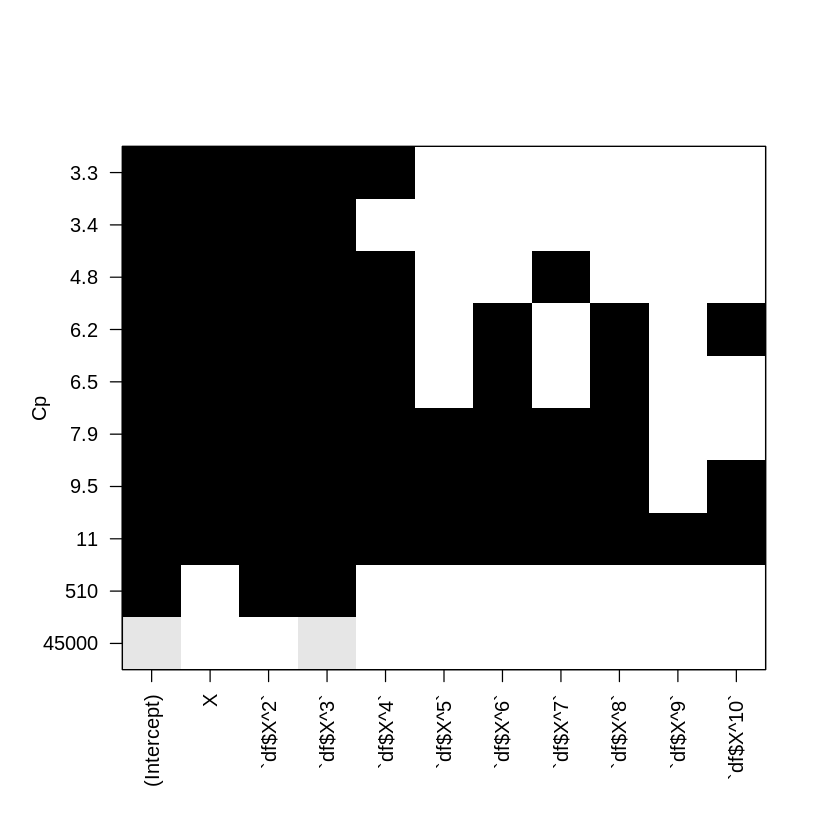

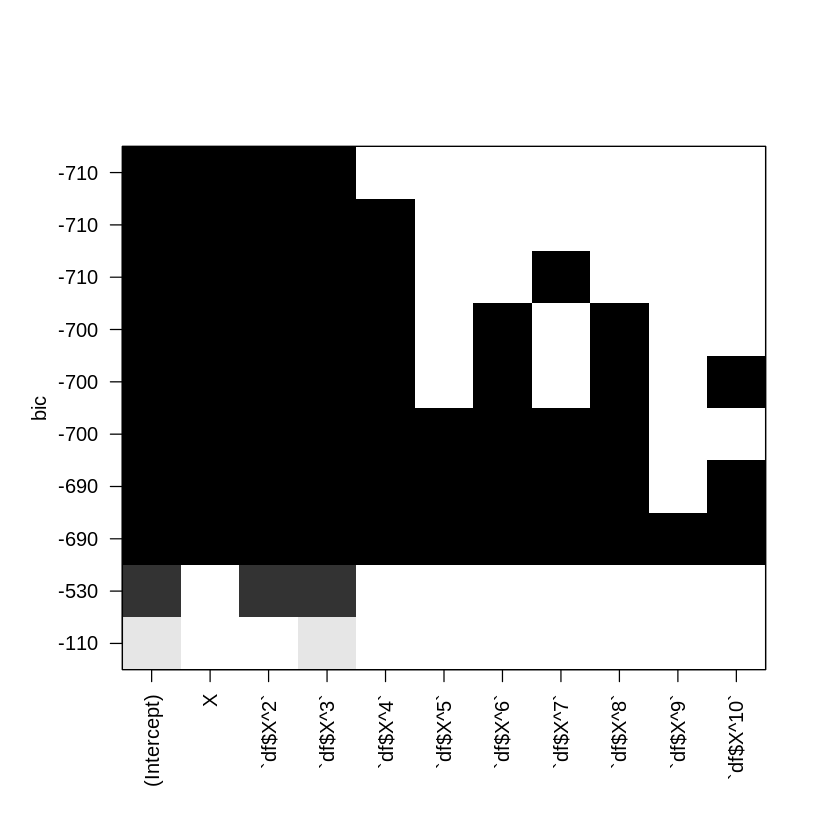

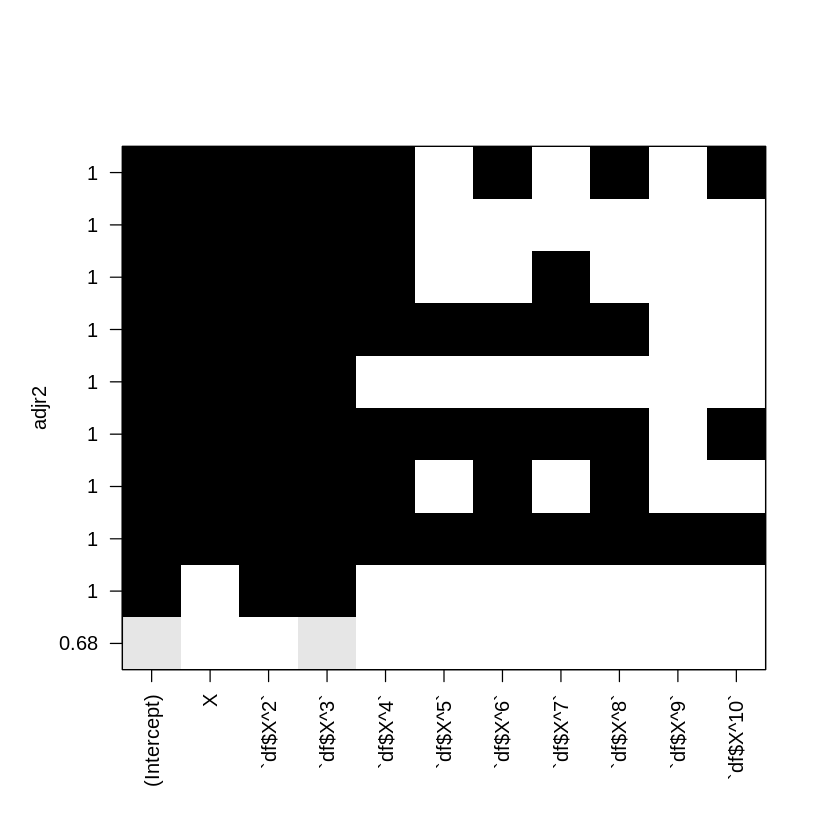

In [112]:
# WRITE YOUR CODE HERE

# plot model fit statistics for each model tested
plot(regfit, scale="Cp") #Mallow's Cp
plot(regfit, scale="bic") #BIC
plot(regfit, scale="adjr2") #adjusted R^2

In [113]:

# get optimal models according to each fit metric
optimal <- data.frame(
  Cp = which.min(reg_summary$cp),
  BIC = which.min(reg_summary$bic),
  Adj_R2 = which.max(reg_summary$adjr2)
)

optimal

# report coefficients from optimal model
mdl_4 <- lm(Y~X+`df$X^2`+`df$X^3`+`df$X^4`, df_for_reg)
summary(mdl_4)$coefficients

mdl_3 <- lm(Y~X+`df$X^2`+`df$X^3`, df_for_reg)
summary(mdl_3)$coefficients

mdl_7 <- lm(Y~X+`df$X^2`+`df$X^3`+`df$X^4`+`df$X^5`+`df$X^6`+`df$X^7`, 
          df_for_reg)
summary(mdl_7)$coefficients

Cp,BIC,Adj_R2
<int>,<int>,<int>
4,3,7


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),14.76975057,0.16592775,89.013141,2.584228e-93
X,5.00298916,0.22540264,22.195788,2.280298e-39
`df$X^2`,20.39530613,0.27715904,73.587014,1.421090e-85
`df$X^3`,10.00671957,0.07442623,134.451518,3.412341e-110
`df$X^4`,-0.08945347,0.06176870,-1.448201,1.508533e-01


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),14.898741,0.1407930,105.82021,3.341709e-101
X,5.061686,0.2229922,22.69893,2.273808e-40
`df$X^2`,20.017678,0.0944664,211.90263,5.076182e-130
`df$X^3`,9.979671,0.0724552,137.73575,4.037031e-112


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),14.746731905,0.19063799,77.35463323,1.624757e-85
X,5.141029162,0.51826068,9.91977465,3.367741e-16
`df$X^2`,20.492182405,0.56211006,36.45581852,1.768553e-56
`df$X^3`,9.878960974,0.82479976,11.97740530,1.777241e-20
`df$X^4`,-0.128020625,0.32849728,-0.38971594,6.976473e-01
`df$X^5`,0.005752023,0.33511545,0.01716430,9.863427e-01
`df$X^6`,0.002575497,0.04865789,0.05293071,9.579019e-01
`df$X^7`,0.003394960,0.03883642,0.08741692,9.305301e-01


> The three different fit metrics (Mallow's Cp, BIC, and Adj. R^2) all return different optimal models. Mallow's Cp suggests the optimal model is one including polynomials up to degree 4, while adjusted R2 suggests the optimal model includes X to X^4 followed by X^6, X^8, and X^10. Only the BIC suggests an optimal model up to X^3, which was the formula used to calculate Y in the simulation function. When examining the coefficients of these models, we do observe that only polynomials up to degree 3 are significantly associated with Y, and the estimates are very close to the parameter values set during the simulation.

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model. 

a) Forward stepwise selection:

In [108]:
# WRITE YOUR CODE HERE

regfit_forward_stepwise <- regsubsets(Y~., df_for_reg, method = 'forward',nvmax=10)
reg_summary_fs <- summary(regfit_forward_stepwise)
reg_summary_fs

Subset selection object
Call: regsubsets.formula(Y ~ ., df_for_reg, method = "forward", nvmax = 10)
10 Variables  (and intercept)
          Forced in Forced out
X             FALSE      FALSE
`df$X^2`      FALSE      FALSE
`df$X^3`      FALSE      FALSE
`df$X^4`      FALSE      FALSE
`df$X^5`      FALSE      FALSE
`df$X^6`      FALSE      FALSE
`df$X^7`      FALSE      FALSE
`df$X^8`      FALSE      FALSE
`df$X^9`      FALSE      FALSE
`df$X^10`     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          X   `df$X^2` `df$X^3` `df$X^4` `df$X^5` `df$X^6` `df$X^7` `df$X^8`
1  ( 1 )  " " " "      "*"      " "      " "      " "      " "      " "     
2  ( 1 )  " " "*"      "*"      " "      " "      " "      " "      " "     
3  ( 1 )  "*" "*"      "*"      " "      " "      " "      " "      " "     
4  ( 1 )  "*" "*"      "*"      "*"      " "      " "      " "      " "     
5  ( 1 )  "*" "*"      "*"      "*"      " "      " "      "*"      " "     
6  ( 1

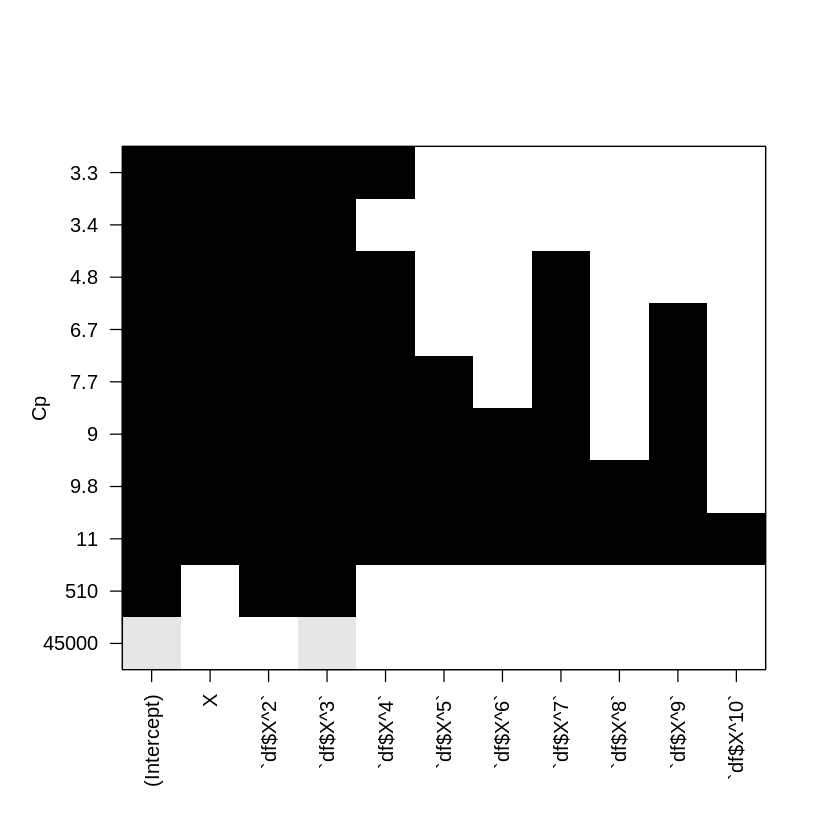

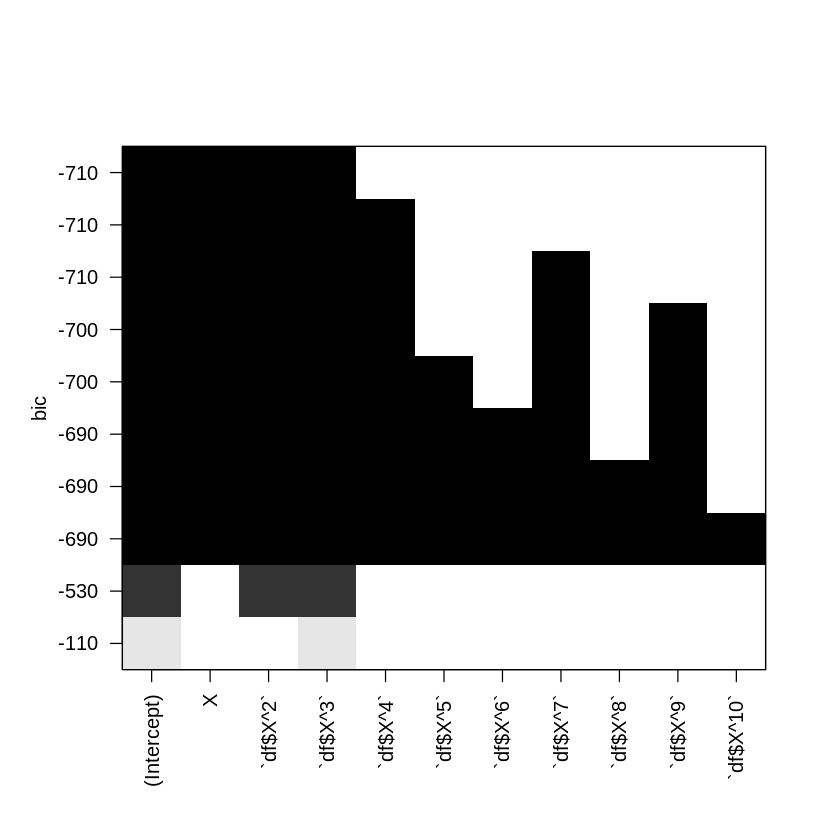

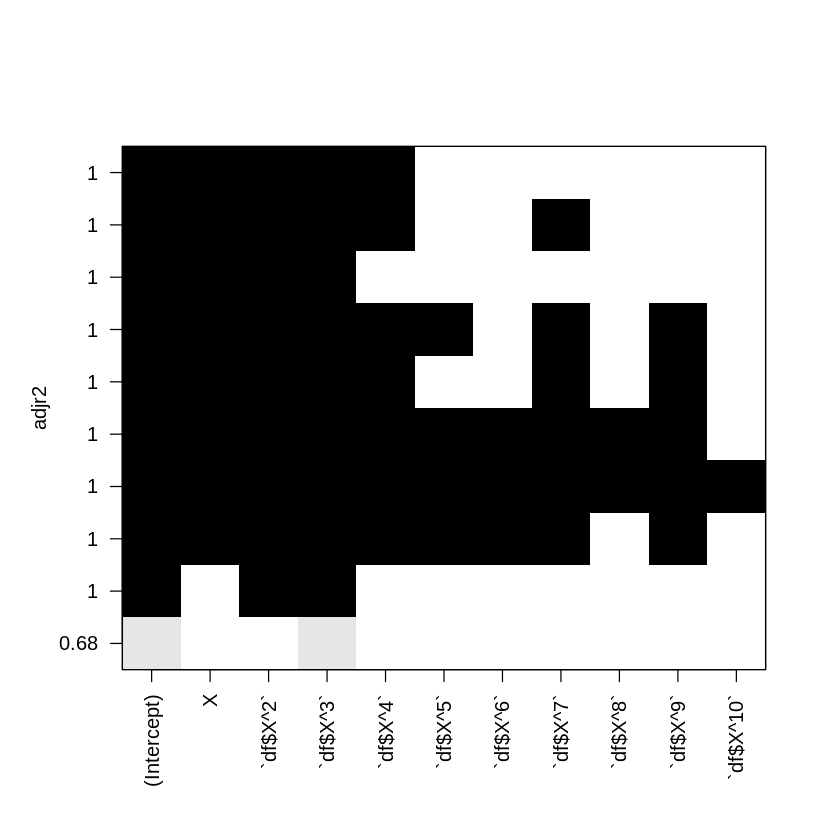

In [109]:
# plot model fit statistics for each model tested
plot(regfit_forward_stepwise, scale="Cp") #Mallow's Cp
plot(regfit_forward_stepwise, scale="bic") #BIC
plot(regfit_forward_stepwise, scale="adjr2") #adjusted R^2

In [110]:
# get optimal models according to each fit metric
optimal <- data.frame(
  Cp = which.min(reg_summary_fs$cp),
  BIC = which.min(reg_summary_fs$bic),
  Adj_R2 = which.max(reg_summary_fs$adjr2)
)

optimal

# report coefficients from optimal model
mdl_4 <- lm(Y~X+`df$X^2`+`df$X^3`+`df$X^4`, df_for_reg)
summary(mdl_4)$coefficients

mdl_3 <- lm(Y~X+`df$X^2`+`df$X^3`, df_for_reg)
summary(mdl_3)$coefficients

Cp,BIC,Adj_R2
<int>,<int>,<int>
4,3,4


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),14.76975057,0.16592775,89.013141,2.584228e-93
X,5.00298916,0.22540264,22.195788,2.280298e-39
`df$X^2`,20.39530613,0.27715904,73.587014,1.421090e-85
`df$X^3`,10.00671957,0.07442623,134.451518,3.412341e-110
`df$X^4`,-0.08945347,0.06176870,-1.448201,1.508533e-01


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),14.898741,0.1407930,105.82021,3.341709e-101
X,5.061686,0.2229922,22.69893,2.273808e-40
`df$X^2`,20.017678,0.0944664,211.90263,5.076182e-130
`df$X^3`,9.979671,0.0724552,137.73575,4.037031e-112


b) Backwards stepwise selection:

In [105]:
# WRITE YOUR CODE HERE
regfit_backward_stepwise <- regsubsets(Y~., df_for_reg, method = 'backward', nvmax=10)
reg_summary_bs <- summary(regfit_backward_stepwise)
reg_summary_bs


Subset selection object
Call: regsubsets.formula(Y ~ ., df_for_reg, method = "backward", nvmax = 10)
10 Variables  (and intercept)
          Forced in Forced out
X             FALSE      FALSE
`df$X^2`      FALSE      FALSE
`df$X^3`      FALSE      FALSE
`df$X^4`      FALSE      FALSE
`df$X^5`      FALSE      FALSE
`df$X^6`      FALSE      FALSE
`df$X^7`      FALSE      FALSE
`df$X^8`      FALSE      FALSE
`df$X^9`      FALSE      FALSE
`df$X^10`     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          X   `df$X^2` `df$X^3` `df$X^4` `df$X^5` `df$X^6` `df$X^7` `df$X^8`
1  ( 1 )  " " " "      "*"      " "      " "      " "      " "      " "     
2  ( 1 )  " " "*"      "*"      " "      " "      " "      " "      " "     
3  ( 1 )  "*" "*"      "*"      " "      " "      " "      " "      " "     
4  ( 1 )  "*" "*"      "*"      "*"      " "      " "      " "      " "     
5  ( 1 )  "*" "*"      "*"      "*"      " "      "*"      " "      " "     
6  (

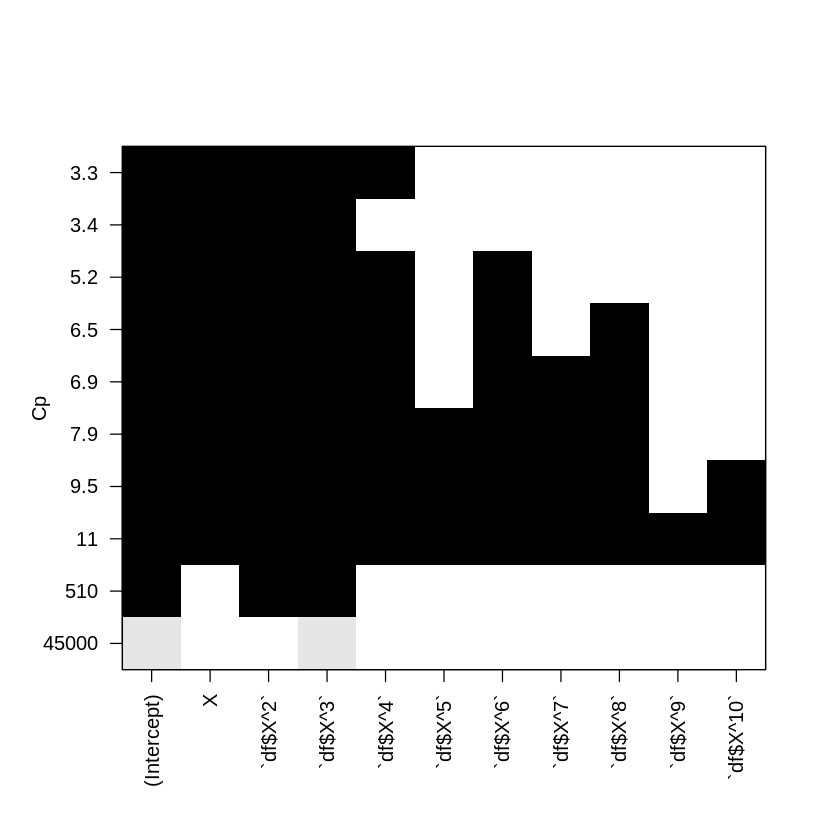

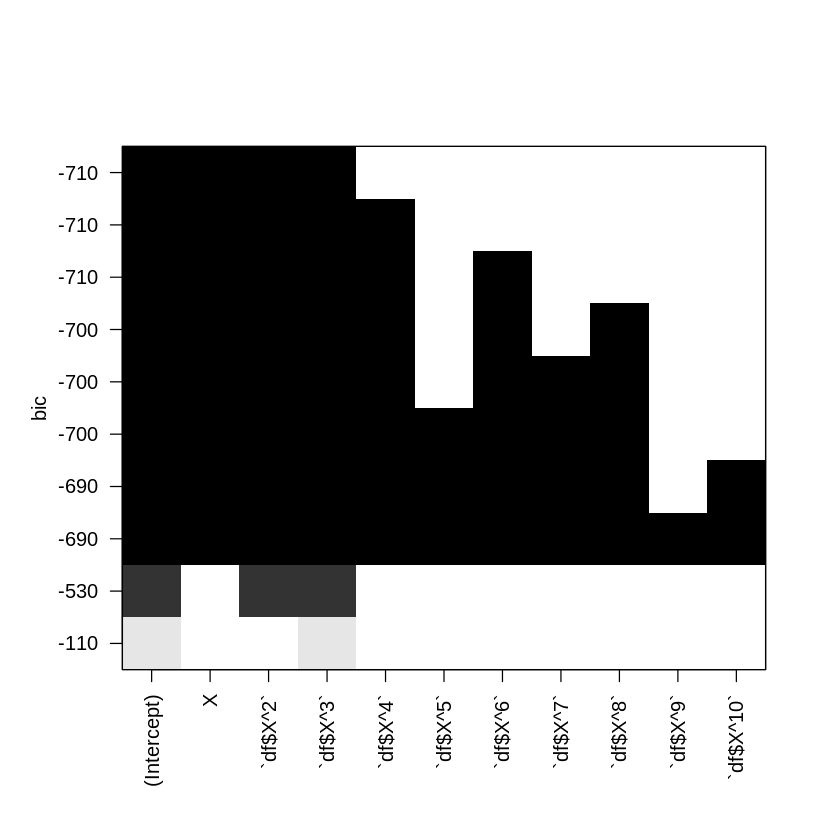

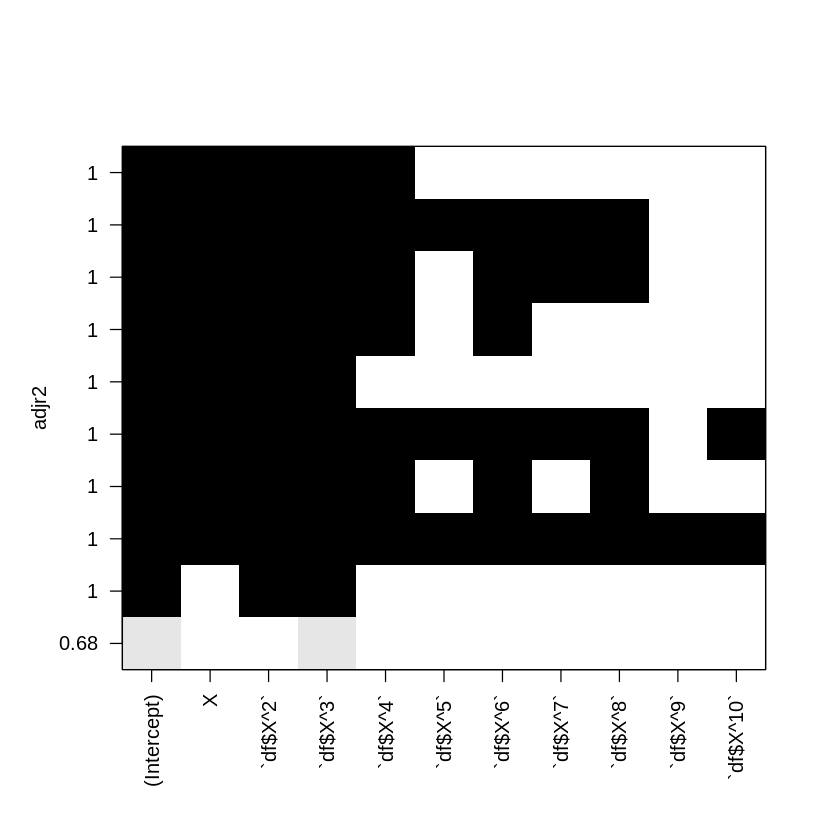

In [106]:
# plot model fit statistics for each model tested
plot(regfit_backward_stepwise, scale="Cp") #Mallow's Cp
plot(regfit_backward_stepwise, scale="bic") #BIC
plot(regfit_backward_stepwise, scale="adjr2") #adjusted R^2

In [107]:
# get optimal models according to each fit metric
optimal <- data.frame(
  Cp = which.min(reg_summary_bs$cp),
  BIC = which.min(reg_summary_bs$bic),
  Adj_R2 = which.max(reg_summary_bs$adjr2)
)

optimal

# report coefficients from optimal model
mdl_4 <- lm(Y~X+`df$X^2`+`df$X^3`+`df$X^4`, df_for_reg)
summary(mdl_4)$coefficients

mdl_3 <- lm(Y~X+`df$X^2`+`df$X^3`, df_for_reg)
summary(mdl_3)$coefficients

Cp,BIC,Adj_R2
<int>,<int>,<int>
4,3,4


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),14.76975057,0.16592775,89.013141,2.584228e-93
X,5.00298916,0.22540264,22.195788,2.280298e-39
`df$X^2`,20.39530613,0.27715904,73.587014,1.421090e-85
`df$X^3`,10.00671957,0.07442623,134.451518,3.412341e-110
`df$X^4`,-0.08945347,0.06176870,-1.448201,1.508533e-01


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),14.898741,0.1407930,105.82021,3.341709e-101
X,5.061686,0.2229922,22.69893,2.273808e-40
`df$X^2`,20.017678,0.0944664,211.90263,5.076182e-130
`df$X^3`,9.979671,0.0724552,137.73575,4.037031e-112


c) Compare your results from parts a and b with those of question 1.

> Both forward and backward stepwise selection methods returned identical optimal models according to the bias-adjusted fit metrics. Unlike the full subset selection, adjusted R^2 returned a model of polynomial degree 4 as optimal, rather than 7. The coefficients across both selection methods again mirror the parameters used to calculate Y in the simulation function, with estimates close to 0 for all higher order terms. 

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset. 

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$ 

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [130]:
# WRITE YOUR CODE HERE

# variables for simulation
set.seed(8)
n = 1000
p = 20

# simulate dataset according to instructions
simulate_dataset <- function(n, p){
  X <- matrix(rnorm(n*p),nrow=n) # matrix of size (n * p)
  Beta <- matrix(rnorm(p),nrow=p) # coefficient matrix (should contain elements of 0)
  eps <- rnorm(n, 0, 1) # noise term
  Y <- (X %*% Beta) + eps # calculate Y according to formula
  return(data.frame(Y=Y, X=X))
}

# simulate a dataset of size (1000, 20)
dat <- simulate_dataset(n,p)

# split into training and test set 
sample <- sample.split(dat$Y, SplitRatio = .9)
train <- subset(dat, sample==TRUE)
test <- subset(dat, sample==FALSE)

b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

In [146]:
# WRITE YOUR CODE HERE

# use regsubsets() to perform best subset selection
regfit_train <- regsubsets(Y~., train, nvmax=20)

# print model summary
reg_train_summary <- summary(regfit_train)
reg_train_summary

optimal <- data.frame(
  Cp = which.min(reg_train_summary$cp),
  BIC = which.min(reg_train_summary$bic),
  Adj_R2 = which.max(reg_train_summary$adjr2)
)

# display optimal model 
optimal

Subset selection object
Call: regsubsets.formula(Y ~ ., train, nvmax = 20)
20 Variables  (and intercept)
     Forced in Forced out
X.1      FALSE      FALSE
X.2      FALSE      FALSE
X.3      FALSE      FALSE
X.4      FALSE      FALSE
X.5      FALSE      FALSE
X.6      FALSE      FALSE
X.7      FALSE      FALSE
X.8      FALSE      FALSE
X.9      FALSE      FALSE
X.10     FALSE      FALSE
X.11     FALSE      FALSE
X.12     FALSE      FALSE
X.13     FALSE      FALSE
X.14     FALSE      FALSE
X.15     FALSE      FALSE
X.16     FALSE      FALSE
X.17     FALSE      FALSE
X.18     FALSE      FALSE
X.19     FALSE      FALSE
X.20     FALSE      FALSE
1 subsets of each size up to 20
Selection Algorithm: exhaustive
          X.1 X.2 X.3 X.4 X.5 X.6 X.7 X.8 X.9 X.10 X.11 X.12 X.13 X.14 X.15
1  ( 1 )  " " " " " " " " " " " " " " " " " " " "  " "  " "  " "  " "  " " 
2  ( 1 )  " " " " " " " " " " " " " " " " " " " "  " "  "*"  " "  " "  " " 
3  ( 1 )  " " " " " " " " " " " " " " " " " " " "  " "  "

Cp,BIC,Adj_R2
<int>,<int>,<int>
16,16,18


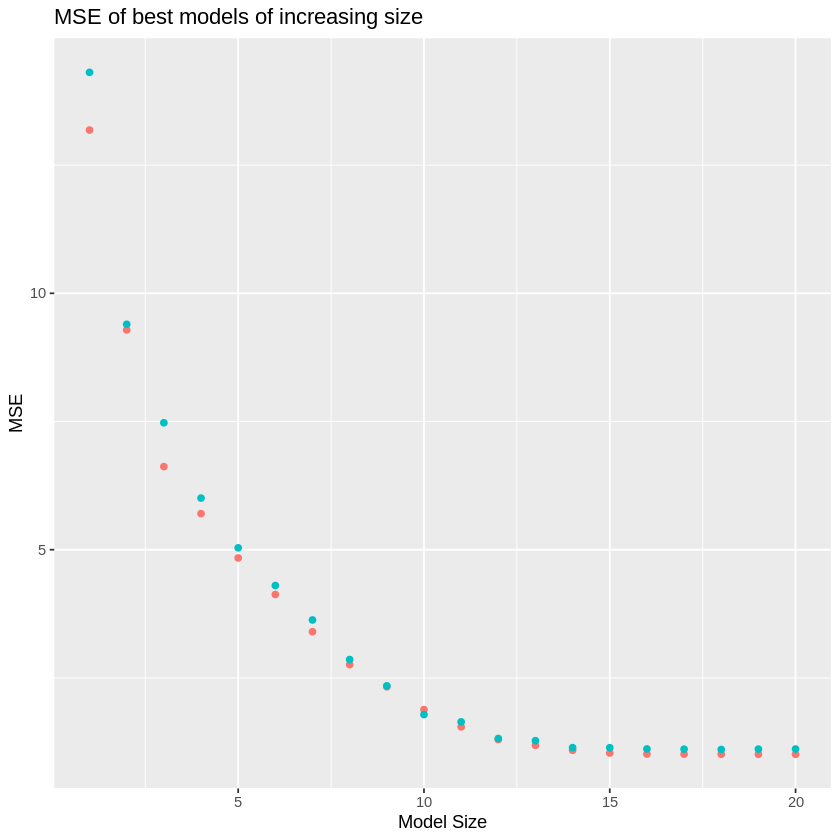

In [211]:
# function for extracting train and test MSE for an optimal model 

get_train_test_MSEs <- function(m){
  models <- reg_train_summary$which[m,-1] # select model of size m
  predictors <- names(which(models == TRUE)) # get boolean labels of model at given size
  predictors <- paste(predictors, collapse = "+") # store variable names
  form <- as.formula(paste0("Y", "~", predictors)) # create formula
  train_mdl <- lm(form, train) # run model on training data
  train_MSE <- mean(train_mdl$residuals ^ 2) # get training set MSE
  preds <- predict(train_mdl, test) # evaluate model on test set
  test_MSE <- mean((test$Y - preds) ^ 2) # get test set MSE
  return(list(train_MSE=train_MSE, test_MSE=test_MSE))
}

# get train and test set MSEs for best models at each size and plot
MSEs <- data.frame(
  Model_size = seq(1:20),
  Train_MSE = rep(NA, 20),
  Test_MSE = rep(NA, 20)

)

for (i in seq(20)){
  mse_values <- get_train_test_MSEs(i)
  MSEs$Train_MSE[i] <- mse_values$train_MSE
  MSEs$Test_MSE[i] <- mse_values$test_MSE
}

ggplot(MSEs, aes(x=Model_size, y = Train_MSE, color='blue')) +
  geom_point() +
  geom_point(aes(y = Test_MSE, color='red')) +
  labs(title='MSE of best models of increasing size', x='Model Size', y='MSE') +
  theme(legend.position = "none")

c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [216]:
# WRITE YOUR CODE HERE

# get model with lowest test MSE
best_model_test_MSE <- which.min(MSEs$Test_MSE)
best_model_test_MSE

[1] 18

> Based on the test set MSE, the optimal model is one containing 18 features. This was also the value returned as optimal according to adjusted R2 based on the best subset selection performed on the training data. The MSE appears to be monotonically decreasing, though it is likely that with additional complexity we would begin to see increased test set MSE compared to training set MSE as the models variance increases to the point of overfit.

**DUE:** 5pm EST, April 10, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*